In [362]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime,timedelta
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima as  pm
import seaborn as sns

In [363]:
def get_gold_price_data(start_date, end_date):
    gold_ticker = 'GC=F'
    
    gold_data = yf.download(gold_ticker, start=start_date, end=end_date)
    
    return gold_data


start_date = '2001-01-01'
end_date = '2023-01-01'

df = get_gold_price_data(start_date, end_date)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,268.399994,268.399994,268.399994,268.399994,268.399994,0
2001-01-03,268.000000,268.000000,268.000000,268.000000,268.000000,1
2001-01-04,267.299988,267.299988,267.299988,267.299988,267.299988,1
2001-01-05,268.000000,268.000000,268.000000,268.000000,268.000000,0
2001-01-08,268.000000,268.000000,268.000000,268.000000,268.000000,0
...,...,...,...,...,...,...
2022-12-23,1794.300049,1802.800049,1794.099976,1795.900024,1795.900024,49
2022-12-27,1803.400024,1826.300049,1803.400024,1814.800049,1814.800049,69
2022-12-28,1803.199951,1807.900024,1803.099976,1807.900024,1807.900024,434


In [364]:
df.drop(["Open", "High", "Low", "Adj Close", "Volume"], inplace=True,axis =1 )
type(df)

pandas.core.frame.DataFrame

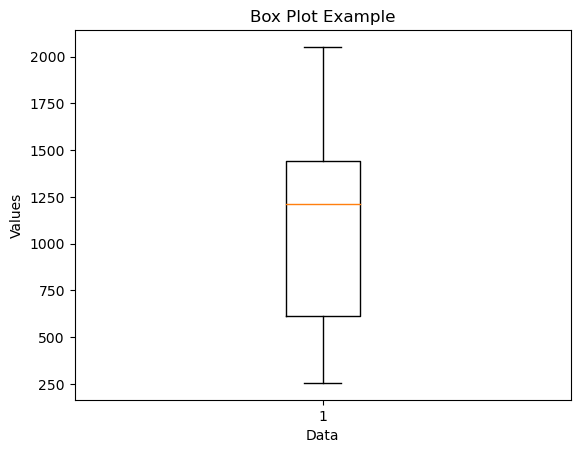

In [365]:
plt.boxplot(df["Close"])
# Add labels and a title
plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Box Plot Example')

# Display the plot
plt.show()

In [366]:
def remove_outliers_iqr(data):
    # Step 1: Sort the data
    sorted_data = sorted(data)
    
    # Step 2: Calculate quartiles
    q1 = sorted_data[int(len(sorted_data) * 0.25)]
    q3 = sorted_data[int(len(sorted_data) * 0.75)]
    
    # Step 3: Calculate IQR
    iqr = q3 - q1
    
    # Step 4: Define outlier boundaries
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Step 5: Identify outliers
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
    # Step 6: Remove outliers
    cleaned_data = [x for x in data if x >= lower_bound and x <= upper_bound]
    
    return cleaned_data, outliers


df["Close"], outliers = remove_outliers_iqr(df["Close"])

In [367]:
outliers      # Got no outliers

[]

In [368]:
df_copy

,Close
Date,
2001-01-31,265.371427
2001-02-28,261.805263
2001-03-31,262.290907
2001-04-30,261.079997
2001-05-31,272.077272
...,...
2022-08-31,1762.478261
2022-09-30,1678.614287
2022-10-31,1665.838094


In [433]:
df_copy.describe()

,Close
count,264.000000
mean,1081.116462
std,506.544426
min,261.079997
25%,608.639036
50%,1208.962286
75%,1434.463043
max,1966.238084


In [369]:
df_copy = df.copy()

In [370]:
df_annual = df.resample('A').mean()
df_annual

,Close
Date,
2001-12-31,271.043724
2002-12-31,310.475601
2003-12-31,363.719601
2004-12-31,409.520481
2005-12-31,445.271774
2006-12-31,604.216402
2007-12-31,697.005157
2008-12-31,870.982609
2009-12-31,974.149207


In [371]:
# downsampling
df = df.resample('M').mean()
df

,Close
Date,
2001-01-31,265.371427
2001-02-28,261.805263
2001-03-31,262.290907
2001-04-30,261.079997
2001-05-31,272.077272
...,...
2022-08-31,1762.478261
2022-09-30,1678.614287
2022-10-31,1665.838094


In [372]:
df_copy = df.copy()

<Axes: title={'center': ' Gold price (daily)'}, xlabel='Date', ylabel='price'>

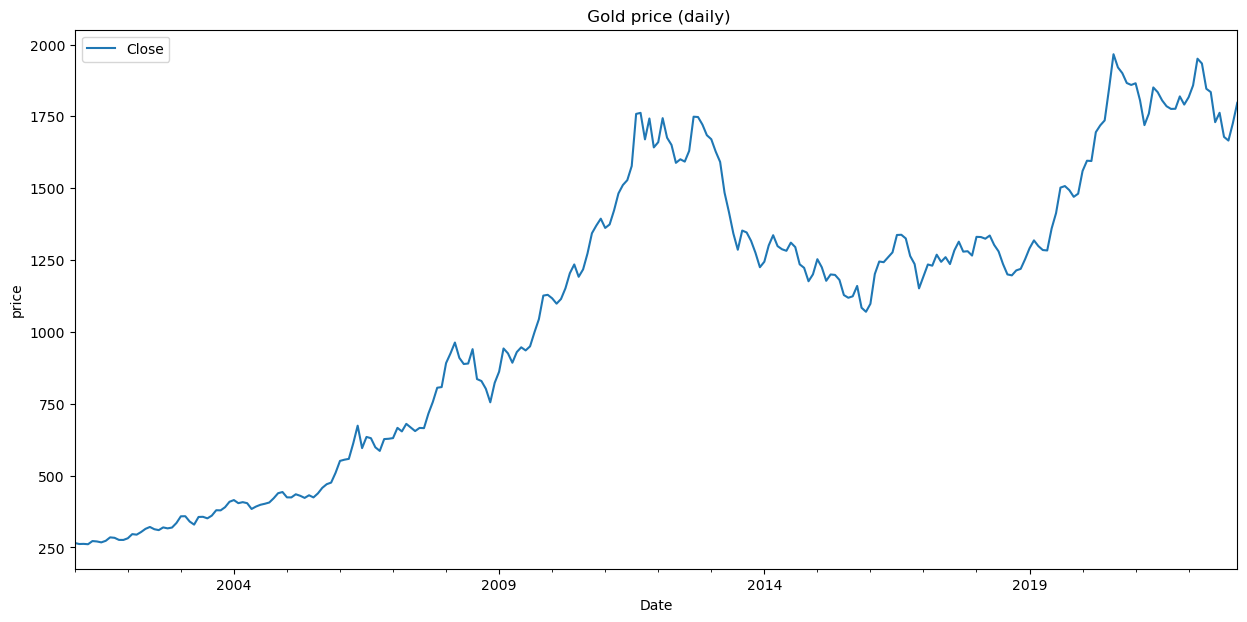

In [373]:
df_copy.plot(figsize = (15,7), ylabel = "price", title=  " Gold price (daily)")

<Axes: title={'center': 'Gold price (monthly)'}, xlabel='Date', ylabel='price'>

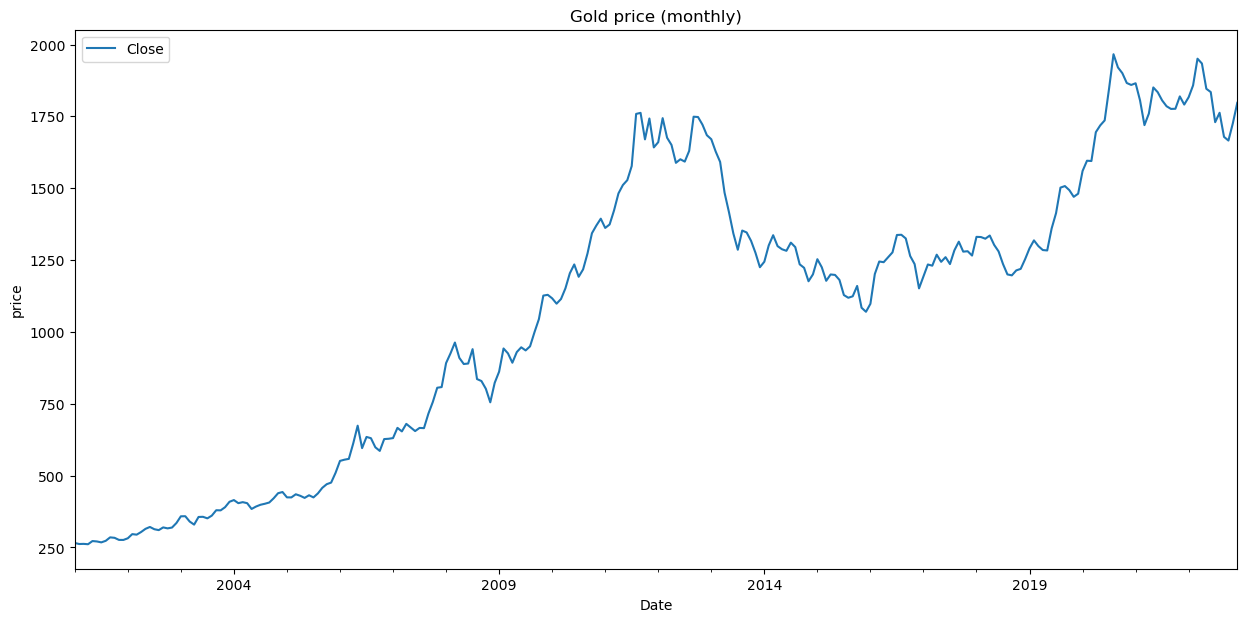

In [374]:
df.plot( figsize = (15,7), ylabel = "price", title=  "Gold price (monthly)")

<Axes: title={'center': ' Gold price (yearly)'}, xlabel='Date', ylabel='price'>

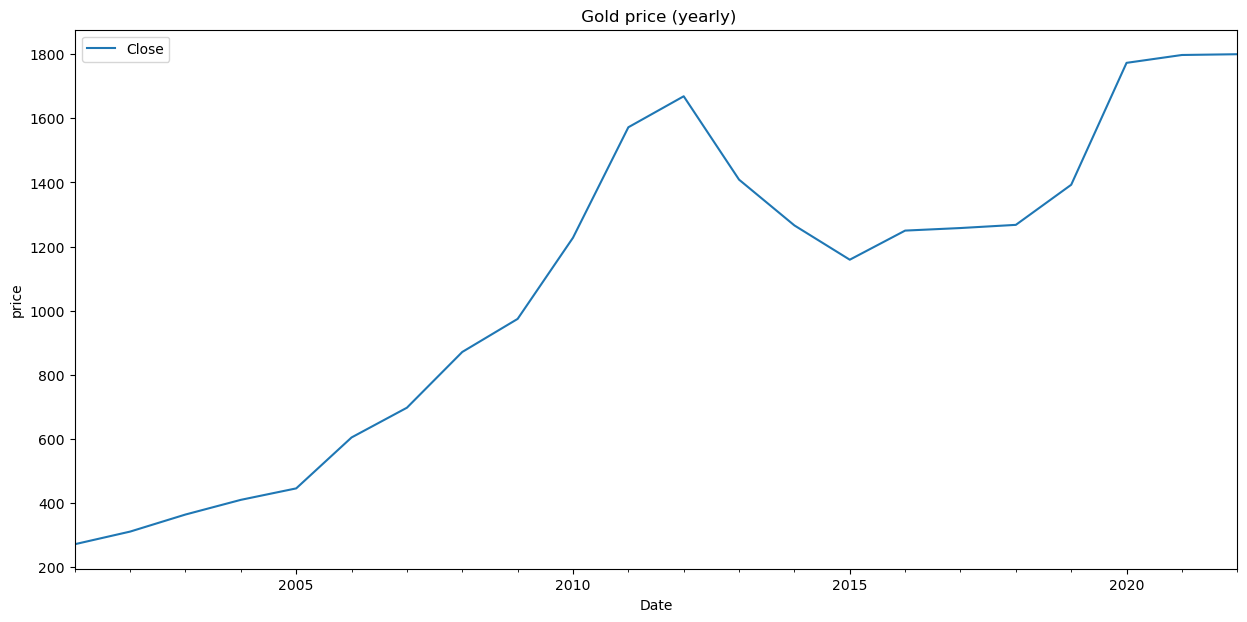

In [375]:
df_annual.plot( figsize = (15,7), ylabel = "price", title= " Gold price (yearly)")

In [376]:
# Min-Max scaling
def normalize_data(data):

    min_vals = data.min()
    max_vals = data.max()
    
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    
    return normalized_data

df.iloc[:,0] = normalize_data(df.iloc[:,0])

In [377]:
df1 = df.copy()
df1

,Close
Date,
2001-01-31,0.002517
2001-02-28,0.000425
2001-03-31,0.000710
2001-04-30,0.000000
2001-05-31,0.006449
...,...
2022-08-31,0.880504
2022-09-30,0.831321
2022-10-31,0.823829


In [378]:
# ADF test for stationarity

result = adfuller(df["Close"])
print("ADF Test Results:")
print(f"ADF Statistic: {result[0]}")
print(f"P-value: {result[1]}")
print("Critical Values:")

for key, value in result[4].items():
    print(f"{key}: {value}")

ADF Test Results:
ADF Statistic: -0.9950248251482464
P-value: 0.7550745538641488
Critical Values:
1%: -3.455558114028747
5%: -2.872635586277424
10%: -2.572682677000175


<Axes: xlabel='Date'>

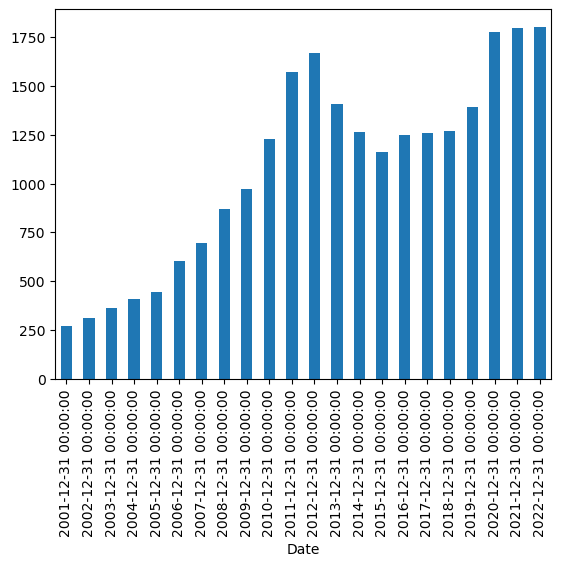

In [379]:
df_annual["Close"].plot(kind = "bar")

<Axes: xlabel='Date'>

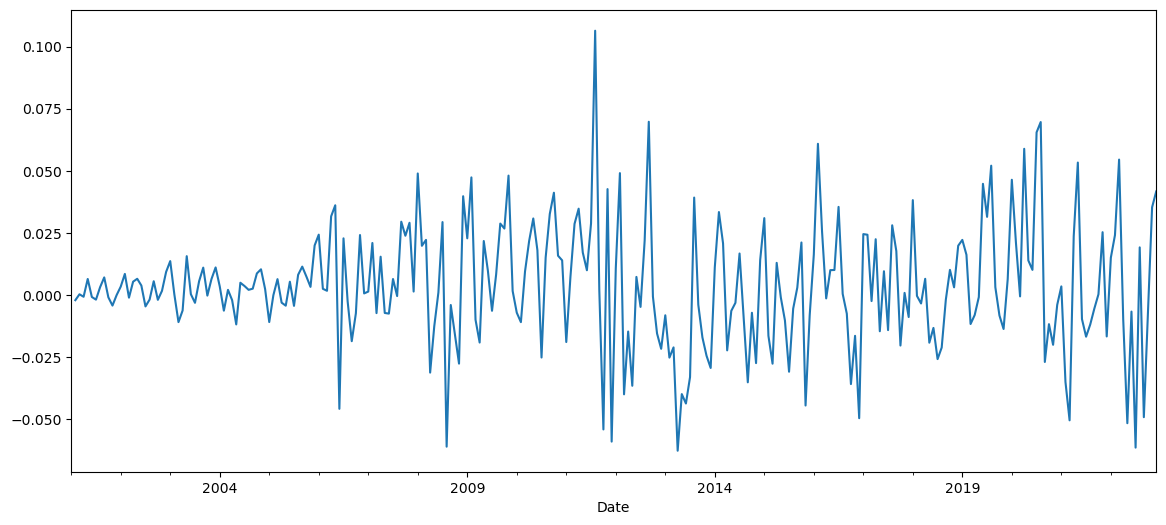

In [380]:
# first difference
df["differenced_close"] = df["Close"].diff().dropna()
df["differenced_close"].plot(figsize = (14,6))

In [381]:
result = adfuller(df["differenced_close"].dropna())
print("ADF Test Results:")
print(f"ADF Statistic: {result[0]}")
print(f"P-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"{key}: {value}")

ADF Test Results:
ADF Statistic: -13.311207813786453
P-value: 6.740842620961758e-25
Critical Values:
1%: -3.455558114028747
5%: -2.872635586277424
10%: -2.572682677000175


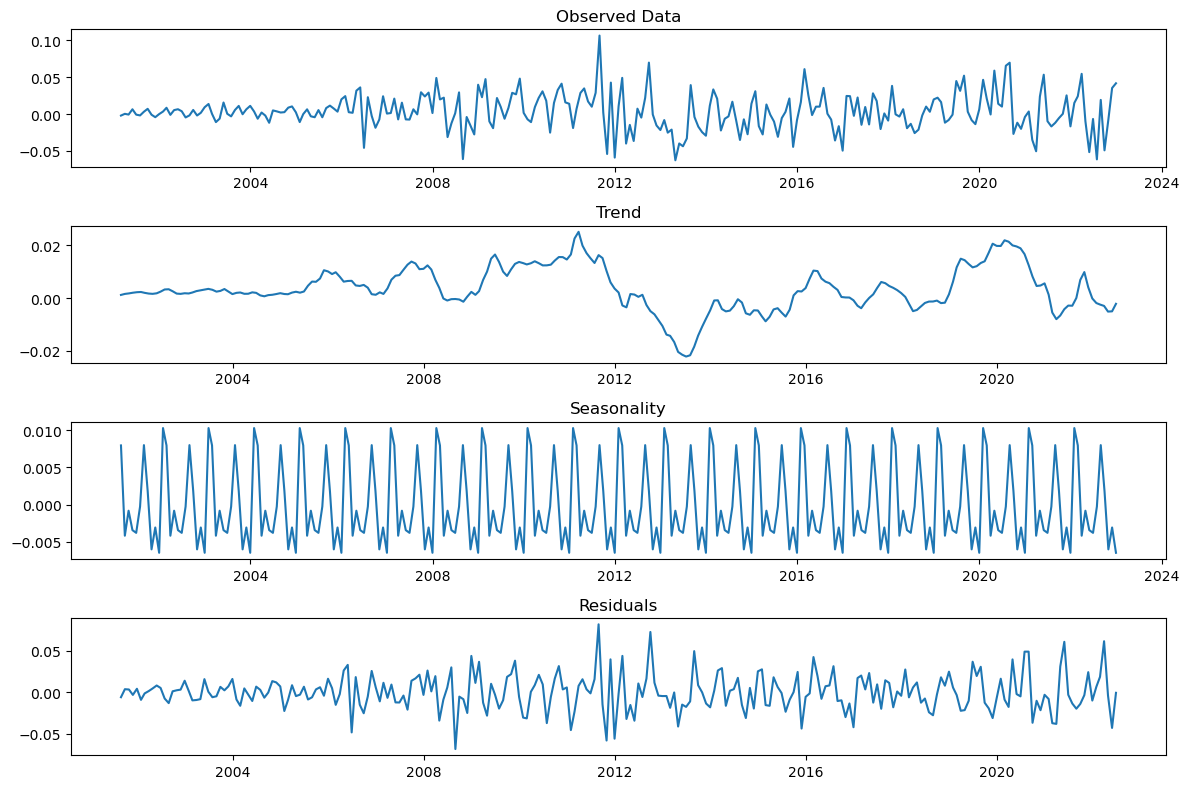

In [382]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(df["differenced_close"].dropna(), model='additive',period = 12) 

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(decomposition.observed)
plt.title('Observed Data')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend)
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal)
plt.title('Seasonality')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid)
plt.title('Residuals')

plt.tight_layout()
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


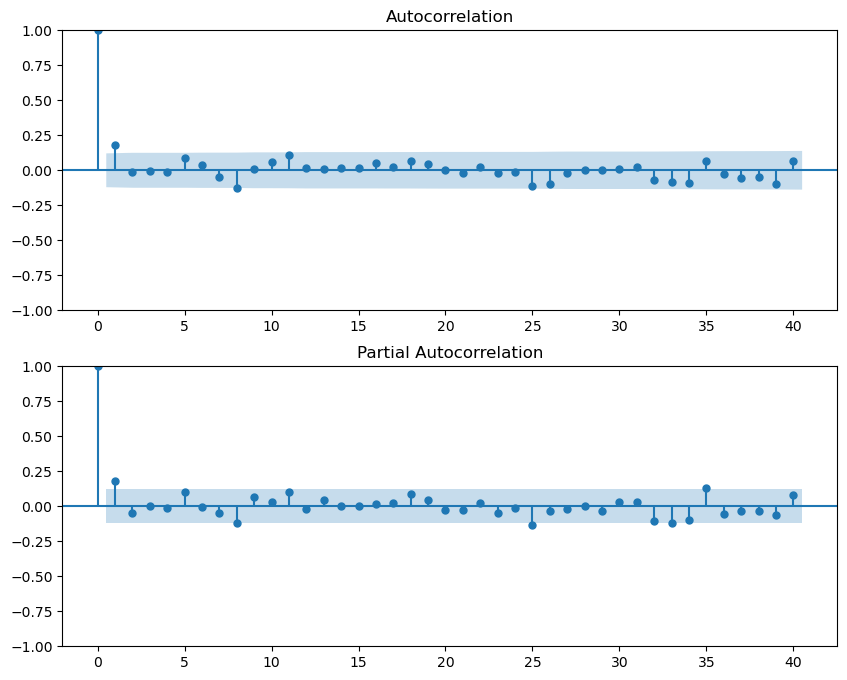

In [383]:
# Plotting PACF and PACF function of first difference for getting the non seasonal parameters i.e. (p,d,q)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df["differenced_close"].dropna(), lags=40, ax=ax1)
plot_pacf(df["differenced_close"].dropna(), lags=40, ax=ax2)
plt.show()

In [384]:
# for seasonal 
df["seasonal_close"] = df["Close"].diff(12)
df

,Close,differenced_close,seasonal_close
Date,,,
2001-01-31,0.002517,NaN,NaN
2001-02-28,0.000425,-0.002091,NaN
2001-03-31,0.000710,0.000285,NaN
2001-04-30,0.000000,-0.000710,NaN
2001-05-31,0.006449,0.006449,NaN
...,...,...,...
2022-08-31,0.880504,0.019164,-0.013344
2022-09-30,0.831321,-0.049183,-0.057054
2022-10-31,0.823829,-0.007493,-0.064842


In [385]:
result = adfuller(df["seasonal_close"].dropna())
print("ADF Test Results:")
print(f"ADF Statistic: {result[0]}")
print(f"P-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"{key}: {value}")

ADF Test Results:
ADF Statistic: -2.4803650704615086
P-value: 0.12032509774439526
Critical Values:
1%: -3.458128284586202
5%: -2.873761835239286
10%: -2.5732834559706235


In [386]:
df["seasonal_close_differenced"] = df["seasonal_close"].diff()

In [387]:
result = adfuller(df["seasonal_close_differenced"].dropna())
print("ADF Test Results:")
print(f"ADF Statistic: {result[0]}")
print(f"P-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"{key}: {value}")

ADF Test Results:
ADF Statistic: -5.496752110304439
P-value: 2.1150044088865e-06
Critical Values:
1%: -3.458128284586202
5%: -2.873761835239286
10%: -2.5732834559706235


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


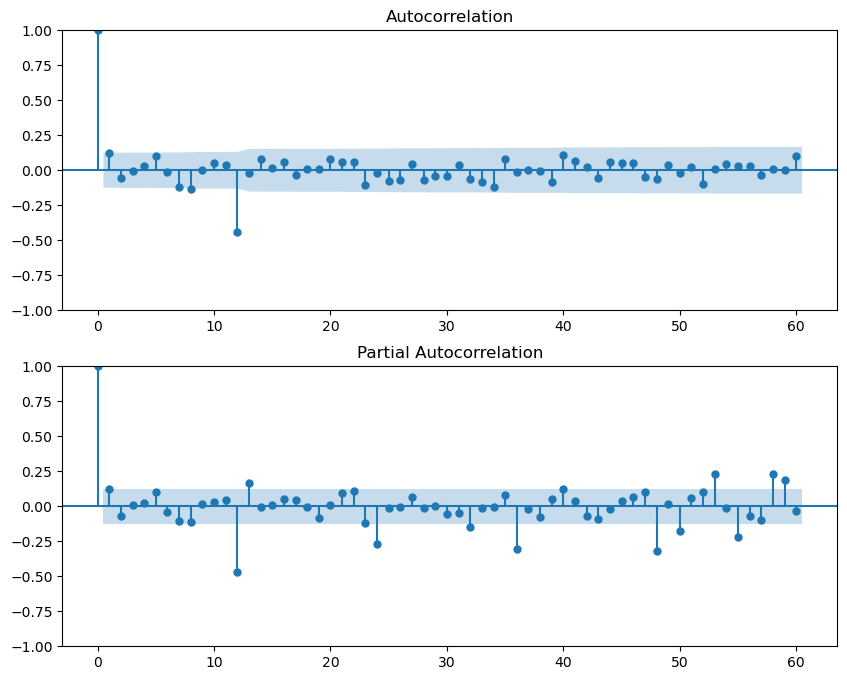

In [388]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df["seasonal_close_differenced"].dropna(), lags=60, ax=ax1)
plot_pacf(df["seasonal_close_differenced"].dropna(), lags=60, ax=ax2)
plt.show()

In [410]:
df1

,Close
Date,
2001-01-31,0.002517
2001-02-28,0.000425
2001-03-31,0.000710
2001-04-30,0.000000
2001-05-31,0.006449
...,...
2022-08-31,0.880504
2022-09-30,0.831321
2022-10-31,0.823829


In [412]:
# training data 
train_ = df1.iloc[252:,:]
train_

,Close
Date,
2022-01-31,0.912267
2022-02-28,0.936372
2022-03-31,0.990872
2022-04-30,0.981053
2022-05-31,0.929449
2022-06-30,0.922769
2022-07-31,0.861339
2022-08-31,0.880504
2022-09-30,0.831321


In [411]:
# training data 
train_data1 = df1.iloc[:252,:]
train_data1

,Close
Date,
2001-01-31,0.002517
2001-02-28,0.000425
2001-03-31,0.000710
2001-04-30,0.000000
2001-05-31,0.006449
...,...
2021-08-31,0.893848
2021-09-30,0.888375
2021-10-31,0.888671


In [391]:
# Fit an SARIMAX model to the time series data
model = SARIMAX(train_data1["Close"], order=(1,1,0),seasonal_order=(0,1,1,12))
fitted_model = model.fit()

print(fitted_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  252
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                 540.560
Date:                              Thu, 14 Sep 2023   AIC                          -1075.121
Time:                                      11:55:49   BIC                          -1064.691
Sample:                                  01-31-2001   HQIC                         -1070.918
                                       - 12-31-2021                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1983      0.055      3.608      0.000       0.091       0.306
ma.S.L12      -0.96

In [392]:
# residuals from the model
res= fitted_model.resid

<Axes: title={'center': 'Plot of Residuals'}, xlabel='Date'>

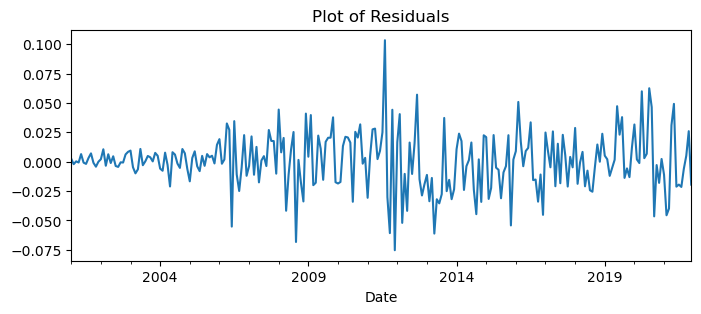

In [419]:
res.plot(title = "Plot of Residuals", figsize = (8,3))     # no clear patterns in the residuals (a good sign)

<Figure size 800x300 with 0 Axes>

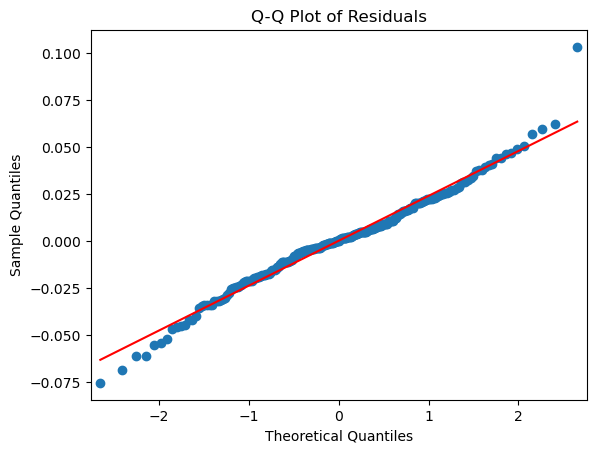

In [426]:
# Create a Q-Q plot of the residuals
plt.figure(figsize = (8,3))
sm.qqplot(res, line='s') 
plt.title('Q-Q Plot of Residuals')
plt.show()              # residuals follows approx normal distribution

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


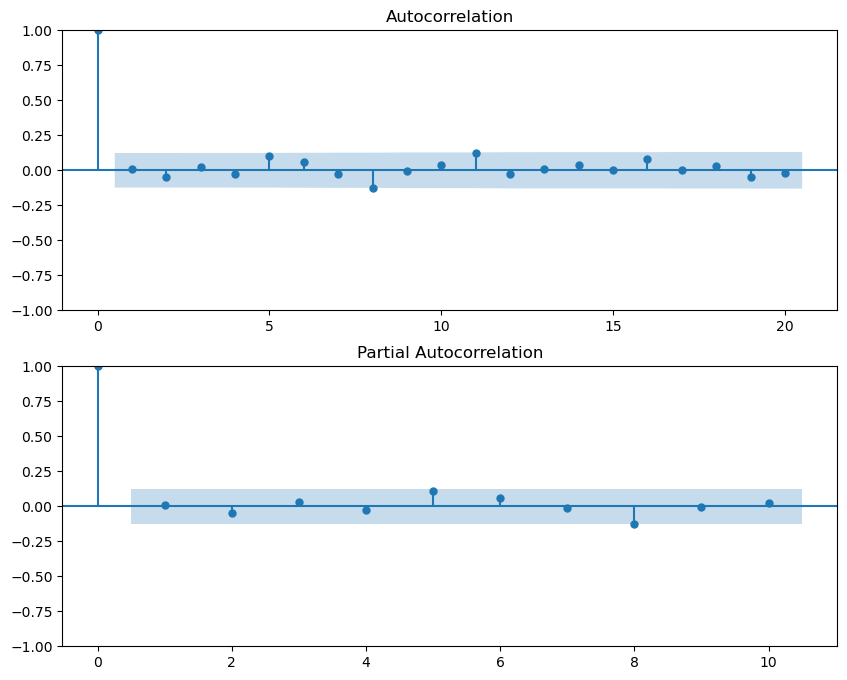

In [395]:
# plotting acf and pacf of residuals 

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(res, lags=20, ax=ax1)
plot_pacf(res, lags=10, ax=ax2)
plt.show()

In [396]:
# Forecast future values using the fitted model
forecast_steps = 12

# Extract the test data for comparison
test_data1 = df1["Close"][-forecast_steps:]
test_data1

Date
2022-01-31    0.912267
2022-02-28    0.936372
2022-03-31    0.990872
2022-04-30    0.981053
2022-05-31    0.929449
2022-06-30    0.922769
2022-07-31    0.861339
2022-08-31    0.880504
2022-09-30    0.831321
2022-10-31    0.823829
2022-11-30    0.859139
2022-12-31    0.900816
Freq: M, Name: Close, dtype: float64

In [397]:
# Get the forecast and confidence intervals
forecast_results = fitted_model.get_forecast(steps=forecast_steps)
forecast = forecast_results.predicted_mean
conf_int = forecast_results.conf_int(alpha = 0.1)

In [398]:
forecast

2022-01-31    0.908694
2022-02-28    0.918301
2022-03-31    0.914317
2022-04-30    0.917874
2022-05-31    0.920781
2022-06-30    0.921122
2022-07-31    0.924711
2022-08-31    0.937125
2022-09-30    0.942279
2022-10-31    0.939891
2022-11-30    0.940138
2022-12-31    0.936906
Freq: M, Name: predicted_mean, dtype: float64

In [399]:
# Calculate evaluation metrics
mae = mean_absolute_error(test_data1, forecast)
mse = mean_squared_error(test_data1, forecast)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(test_data1, forecast)
mape = np.mean(np.abs((test_data1 - forecast) / test_data1)) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Log Error (MSLE): {msle}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Error (MAE): 0.052983194788387096
Mean Squared Error (MSE): 0.004261419665615946
Root Mean Squared Error (RMSE): 0.06527955013337597
Mean Squared Log Error (MSLE): 0.001178357616231767
Mean Absolute Percentage Error (MAPE): 6.021370166594295


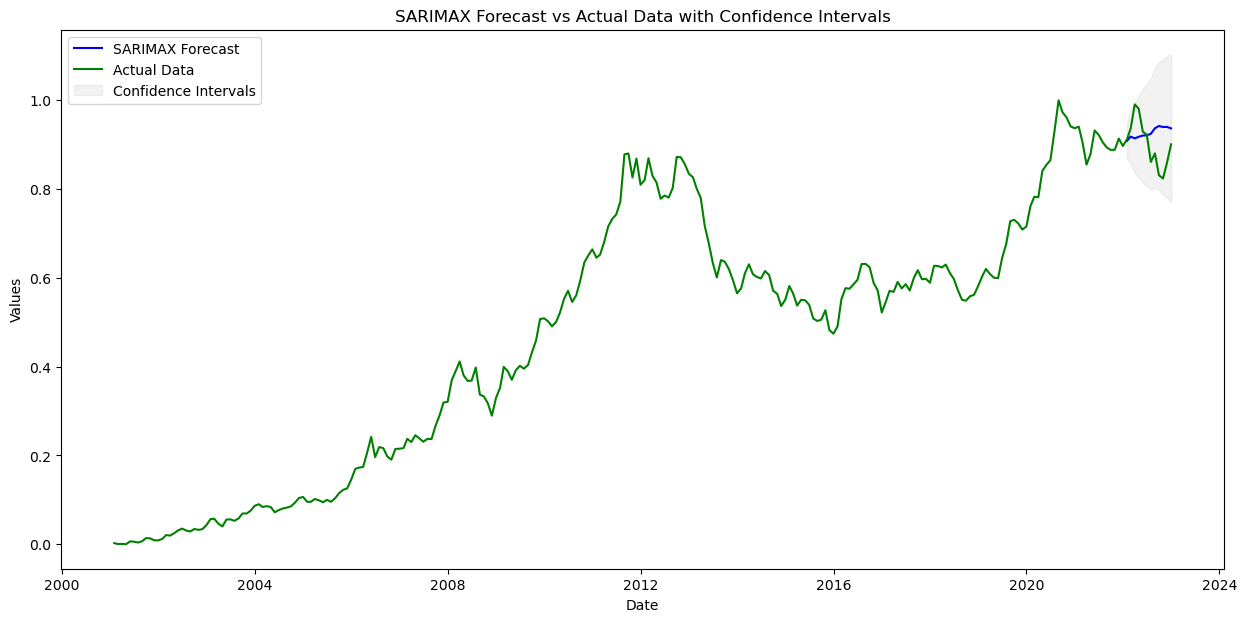

In [400]:
# plot the forecasted values and 90% confidence interval

plt.figure(figsize=(15, 7))
plt.plot(forecast.index, forecast, label='SARIMAX Forecast', color='blue')
plt.plot(df.index, df["Close"], label='Actual Data', color='green')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.1, label='Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.title('SARIMAX Forecast vs Actual Data with Confidence Intervals')
plt.show()

# Auto ARIMA

In [401]:
model1 = pm.auto_arima(train_data1["Close"], m = 12, seasonal =True, start_p = 0 ,d=1, start_q = 0,max_p=1, max_q = 1,
                     max_order = 5, test = "adf", stepwise=False, trace = True,D = 1,max_P = 4, max_Q =1)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-949.423, Time=0.06 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.81 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-1005.314, Time=0.40 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.75 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-1025.095, Time=1.30 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=3.33 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=-1031.842, Time=1.47 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=inf, Time=4.55 sec
 ARIMA(0,1,0)(4,1,0)[12]             : AIC=-1046.360, Time=6.80 sec
 ARIMA(0,1,0)(4,1,1)[12]             : AIC=inf, Time=7.26 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-951.683, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.25 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-1014.129, Time=0.35 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=1.84 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-1030.994, Time=1.08 sec
 ARIMA(0,1,1)(2,1,1)[12]

In [402]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  252
Model:             SARIMAX(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood                 537.586
Date:                            Thu, 14 Sep 2023   AIC                          -1063.171
Time:                                    11:57:20   BIC                          -1042.313
Sample:                                01-31-2001   HQIC                         -1054.766
                                     - 12-31-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3163      0.193     -1.641      0.101      -0.694       0.062
ma.L1          0.5328      0.175      3.050      0.002       0.190       0.875
ar.S.L12       0.0245      0.098      0.249      0.803      -0.168       0.217
ar.S.L24      -0.0639      0.081     -0.787      0.431      -0.223       0.095
ma.S.L12      -0.8076      0.097     -8.336      0.000      -0.997      -0.618
sigma2         0.0006    5.2e-05     11.877      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                16.25
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               2.22   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Forecasting 

In [403]:
# Fit an SARIMAX model to the time series data
model2 = SARIMAX(df_copy.iloc[:-1,:], order=(1,1,0),seasonal_order=(0,1,1,12))
fitted_model2 = model2.fit()

print(fitted_model2.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  263
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood               -1302.052
Date:                              Thu, 14 Sep 2023   AIC                           2610.103
Time:                                      11:57:20   BIC                           2620.668
Sample:                                  01-31-2001   HQIC                          2614.355
                                       - 11-30-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1853      0.058      3.218      0.001       0.072       0.298
ma.S.L12      -0.98

In [404]:
# Get the forecast and confidence intervals
forecast_results2 = fitted_model2.get_forecast(steps=13)
forecast2 = forecast_results2.predicted_mean
conf_int = forecast_results2.conf_int(alpha = 0.1)

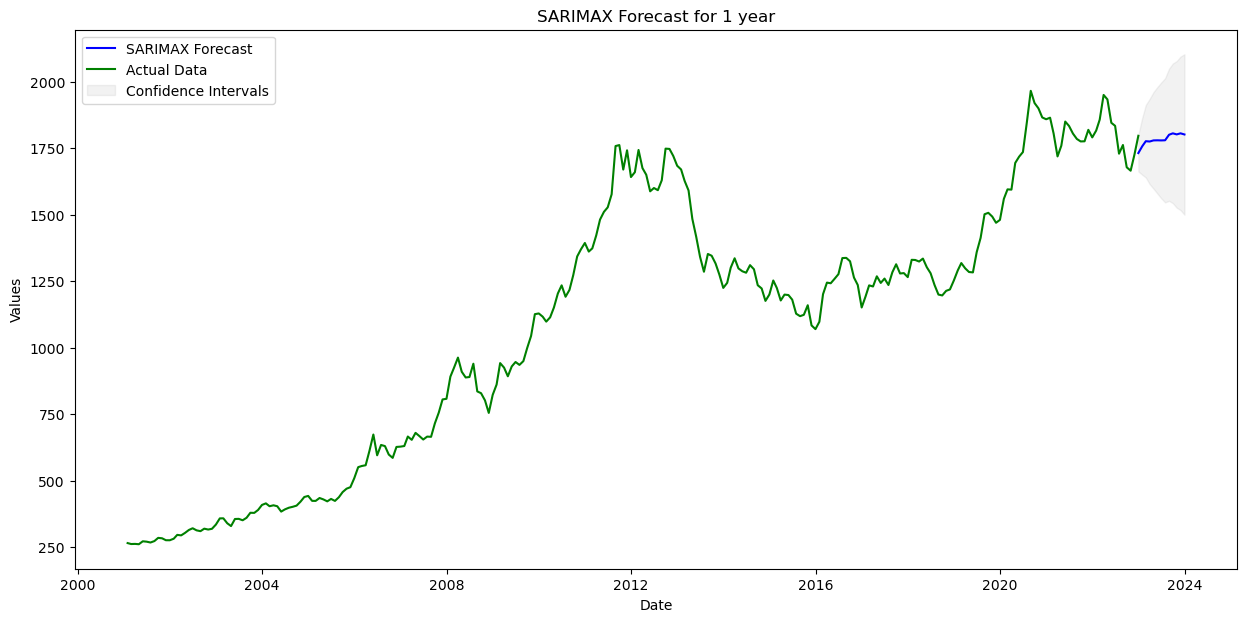

In [427]:
# plot the forecasted values and 90% confidence interval
plt.figure(figsize=(15, 7))
plt.plot(forecast2.index, forecast2, label='SARIMAX Forecast', color='blue')
plt.plot(df_copy.index, df_copy["Close"], label='Actual Data', color='green')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.1, label='Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.title('SARIMAX Forecast for 1 year')
plt.show()